## Section 1

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [2]:
df = pd.read_table('MM.data', header=None ,sep=',')

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


### Q 1.1)

In [3]:
df.shape

(19020, 11)

There are 11 features and 19,020 observations.

### Q 1.2)

In [5]:
df.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10     object
dtype: object

In [8]:
df[10].value_counts()

g    12332
h     6688
Name: 10, dtype: int64

11th feature is the categorical variable with 2 levels 'g' and 'h'.

### Q 1.3)

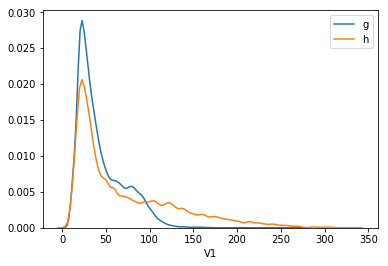

In [14]:
sns.kdeplot(df.loc[df[10]=='g', 0], bw=3, label='g')
sns.kdeplot(df.loc[df[10]=='h', 0], bw=3, label='h').set_xlabel('V1')
plt.legend();

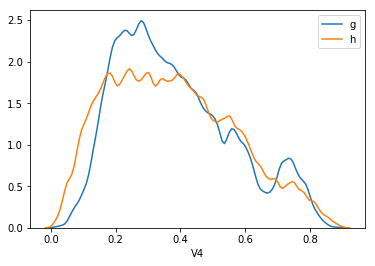

In [15]:
sns.kdeplot(df.loc[df[10]=='g', 3], bw=0.01, label='g')
sns.kdeplot(df.loc[df[10]=='h', 3], bw=0.01, label='h').set_xlabel('V4')
plt.legend();

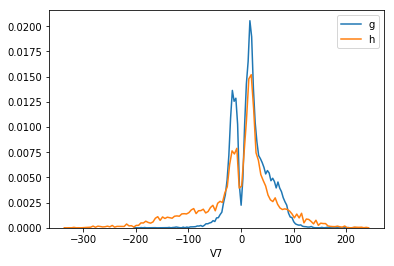

In [16]:
sns.kdeplot(df.loc[df[10]=='g', 6], bw=1.5, label='g')
sns.kdeplot(df.loc[df[10]=='h', 6], bw=1.5, label='h').set_xlabel('V7')
plt.legend();

### Q 1.4)

In [20]:
df.columns = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'target']

# Get absolute values for correlation coefficients
c = df.iloc[:, 0:10].corr().abs()

#Reshape and sort
s = c.unstack()
so = s.sort_values(kind="quicksort")

print(so)

V6   V8     0.002553
V8   V6     0.002553
V9   V8     0.004659
V8   V9     0.004659
V9   V1     0.008777
V1   V9     0.008777
V5   V8     0.010966
V8   V5     0.010966
V4   V8     0.011294
V8   V4     0.011294
V10  V8     0.011427
V8   V10    0.011427
     V1     0.013389
V1   V8     0.013389
V3   V8     0.015455
V8   V3     0.015455
V7   V8     0.017197
V8   V7     0.017197
V7   V10    0.037025
V10  V7     0.037025
V2   V8     0.039744
V8   V2     0.039744
V9   V6     0.055689
V6   V9     0.055689
V2   V9     0.066061
V9   V2     0.066061
V7   V3     0.095157
V3   V7     0.095157
V6   V5     0.100159
V5   V6     0.100159
V4   V6     0.112272
V6   V4     0.112272
V7   V5     0.118769
V5   V7     0.118769
V7   V1     0.119747
V1   V7     0.119747
V4   V7     0.121899
V7   V4     0.121899
V3   V6     0.159863
V6   V3     0.159863
V2   V7     0.176234
V7   V2     0.176234
V9   V7     0.186275
V7   V9     0.186275
V3   V9     0.186675
V9   V3     0.186675
V10  V6     0.206730
V6   V10    0

The highest absolute correlation is between the pairs (V4, V5) and (V3, V4). The lowest correlation is between the pairs (V6, V8) and (V9, V8).

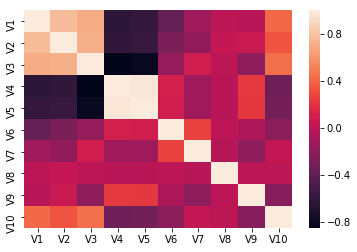

In [24]:
X = df.iloc[:, 0:10]

# calculate the correlation matrix
corr = X.corr()

# plot the heatmap
sns.heatmap(corr,
            xticklabels=X.columns,
            yticklabels=X.columns)

## Section 2

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Hyperparameter tuning library
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
# Gradient boosting library
import lightgbm as lgb
import time

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [2]:
df = pd.read_table('MM.data', header=None ,sep=',')

In [3]:
df.columns = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'target']

df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,target
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [5]:
X = df.iloc[:, 0:10]
y = (df['target'] == 'g').astype(int)

The approach here will be to use a gradient boosted machine classifier to predict the binary target variable. GBM's have featured in many competition winning solutions to real life data science competitions and also online in Kaggle. The lightgbm package is personally my favourite as it handles categorical data in a very clever way out of the box (better than just dummy coding), which other implementations do not.

Given more time on the problem it is still recommended to explore other classifiers, e.g. RFs, decision trees, AdaBoost, logistic regression, SVMs and even address it as a deep learning problem.

From experience, if time is short then predictive performance is better attained by hyperparameter optimisations of a single good algorithm, rather than dilute this search across multiple algorithms.

5-fold cross validation and early stopping will be used to determine the best hyperparameter configuration and to estimate the validation error.

Since the problem has remained vague and the classes are not largely imbalanced then any standard performance metric could be used to determine the best model. Typical the choices for me would be.

- log-loss: this is the default performance metric for classification problems.
- misclassification rate: This would be used if the client had a strong preference for classification accuracy.
- AUC: This would be used when the client had a strong preference for the ability of the model to rank observations from "good-to-bad".

For this model the standard log-loss will be used.

For hyperparameter tuning we will use a Tree-structured Parzen Estimator. This search algorithm has the advantage over a randomised search as it "learns" over time which configurations work and can converge faster to a global optimum.


In [10]:
# object to store results from TPE search
trials = Trials()

# Number of model configurations to try
max_evals = 1000

# Hyperspace to search over
space = {
    'num_leaves': hp.quniform('num_leaves', 2, 1000, 1),
    'reg_alpha': hp.uniform('reg_alpha', 0, 50),
    'reg_lambda': hp.uniform('reg_lambda', 0, 50),
    'subsample': hp.uniform('subsample', 0.3, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1),
    'min_data': hp.quniform('min_data', 1, 100, 1),
    'max_depth': hp.quniform('max_depth', 1, 20, 1),
    'learning_rate': 0.1,
    'objective': 'binary',
    'random_state': 42,
    'n_jobs': -1,
    'verbose':-1,
    'metrics': 'binary_logloss'}

# scoring function to minimise
def score(params):

    tcurrent = time.time()

    params = {
        'num_leaves': int(params['num_leaves']),
        'max_depth': int(params['max_depth']),
        'subsample': params['subsample'],
        'colsample_bytree': params['colsample_bytree'],
        'random_state': params['random_state'],
        'learning_rate': params['learning_rate'],
        'objective': params['objective'],
        'n_jobs': params['n_jobs'],
        'reg_alpha': params['reg_alpha'],
        'reg_lambda': params['reg_lambda'],
        'min_data': int(params['min_data']),
        'verbose': params['verbose'],
        'metrics': params['metrics']
    }

    lgb_train = lgb.Dataset(X, y)

    clf = lgb.cv(params=params,
                 train_set=lgb_train,
                 num_boost_round=10000,
                 early_stopping_rounds=30,
                 nfold=5,
                 stratified=True)

    logloss = pd.Series(clf['binary_logloss-mean']).min()

    trees = len(pd.Series(clf['binary_logloss-mean'])) + 1

    loss = logloss

    print('Run number:', len(trials.results), '/', max_evals,
          "\tlogloss: ", round(logloss, 4),
          "\tTrees: ", round(trees, 4),
          '\tIteration time:', round((time.time() - tcurrent), 2), 'seconds')

    return {'loss': loss, 'status': STATUS_OK, 'logloss': logloss, 'trees': trees}

In [11]:
# Initialise the search
best_params = fmin(score,
                   space,
                   algo=tpe.suggest,
                   trials=trials,
                   max_evals=max_evals)

Run number: 1 / 1000 	logloss:  0.3047 	Trees:  341 	Iteration time: 1.51 seconds
Run number: 2 / 1000 	logloss:  0.2869 	Trees:  420 	Iteration time: 9.2 seconds
Run number: 3 / 1000 	logloss:  0.3173 	Trees:  399 	Iteration time: 1.29 seconds
Run number: 4 / 1000 	logloss:  0.2992 	Trees:  420 	Iteration time: 2.66 seconds
Run number: 5 / 1000 	logloss:  0.3072 	Trees:  308 	Iteration time: 1.62 seconds
Run number: 6 / 1000 	logloss:  0.3203 	Trees:  168 	Iteration time: 1.16 seconds
Run number: 7 / 1000 	logloss:  0.2907 	Trees:  428 	Iteration time: 5.71 seconds
Run number: 8 / 1000 	logloss:  0.2861 	Trees:  303 	Iteration time: 3.7 seconds
Run number: 9 / 1000 	logloss:  0.3306 	Trees:  984 	Iteration time: 1.72 seconds
Run number: 10 / 1000 	logloss:  0.2971 	Trees:  489 	Iteration time: 3.53 seconds
Run number: 11 / 1000 	logloss:  0.3194 	Trees:  702 	Iteration time: 1.57 seconds
Run number: 12 / 1000 	logloss:  0.3171 	Trees:  244 	Iteration time: 0.82 seconds
Run number: 13 

Run number: 100 / 1000 	logloss:  0.2944 	Trees:  522 	Iteration time: 3.72 seconds
Run number: 101 / 1000 	logloss:  0.3037 	Trees:  350 	Iteration time: 1.55 seconds
Run number: 102 / 1000 	logloss:  0.2885 	Trees:  476 	Iteration time: 5.08 seconds
Run number: 103 / 1000 	logloss:  0.296 	Trees:  692 	Iteration time: 5.89 seconds
Run number: 104 / 1000 	logloss:  0.2907 	Trees:  1054 	Iteration time: 2.87 seconds
Run number: 105 / 1000 	logloss:  0.3738 	Trees:  10001 	Iteration time: 14.99 seconds
Run number: 106 / 1000 	logloss:  0.2862 	Trees:  665 	Iteration time: 2.93 seconds
Run number: 107 / 1000 	logloss:  0.2881 	Trees:  241 	Iteration time: 4.6 seconds
Run number: 108 / 1000 	logloss:  0.3177 	Trees:  415 	Iteration time: 1.36 seconds
Run number: 109 / 1000 	logloss:  0.287 	Trees:  323 	Iteration time: 4.56 seconds
Run number: 110 / 1000 	logloss:  0.2912 	Trees:  606 	Iteration time: 5.09 seconds
Run number: 111 / 1000 	logloss:  0.326 	Trees:  480 	Iteration time: 0.99 

Run number: 198 / 1000 	logloss:  0.3203 	Trees:  208 	Iteration time: 0.85 seconds
Run number: 199 / 1000 	logloss:  0.29 	Trees:  610 	Iteration time: 3.41 seconds
Run number: 200 / 1000 	logloss:  0.2873 	Trees:  229 	Iteration time: 6.77 seconds
Run number: 201 / 1000 	logloss:  0.2869 	Trees:  338 	Iteration time: 4.18 seconds
Run number: 202 / 1000 	logloss:  0.3198 	Trees:  185 	Iteration time: 1.07 seconds
Run number: 203 / 1000 	logloss:  0.2872 	Trees:  374 	Iteration time: 3.95 seconds
Run number: 204 / 1000 	logloss:  0.2872 	Trees:  366 	Iteration time: 5.35 seconds
Run number: 205 / 1000 	logloss:  0.3151 	Trees:  199 	Iteration time: 1.12 seconds
Run number: 206 / 1000 	logloss:  0.2876 	Trees:  532 	Iteration time: 5.57 seconds
Run number: 207 / 1000 	logloss:  0.3237 	Trees:  180 	Iteration time: 0.76 seconds
Run number: 208 / 1000 	logloss:  0.3155 	Trees:  377 	Iteration time: 1.44 seconds
Run number: 209 / 1000 	logloss:  0.3272 	Trees:  151 	Iteration time: 0.86 se

Run number: 296 / 1000 	logloss:  0.3533 	Trees:  6453 	Iteration time: 9.69 seconds
Run number: 297 / 1000 	logloss:  0.2953 	Trees:  2315 	Iteration time: 4.02 seconds
Run number: 298 / 1000 	logloss:  0.2904 	Trees:  665 	Iteration time: 3.99 seconds
Run number: 299 / 1000 	logloss:  0.2875 	Trees:  599 	Iteration time: 3.49 seconds
Run number: 300 / 1000 	logloss:  0.286 	Trees:  283 	Iteration time: 2.37 seconds
Run number: 301 / 1000 	logloss:  0.3105 	Trees:  261 	Iteration time: 0.97 seconds
Run number: 302 / 1000 	logloss:  0.2888 	Trees:  751 	Iteration time: 2.73 seconds
Run number: 303 / 1000 	logloss:  0.2886 	Trees:  685 	Iteration time: 5.07 seconds
Run number: 304 / 1000 	logloss:  0.286 	Trees:  290 	Iteration time: 5.24 seconds
Run number: 305 / 1000 	logloss:  0.3147 	Trees:  776 	Iteration time: 2.37 seconds
Run number: 306 / 1000 	logloss:  0.325 	Trees:  434 	Iteration time: 1.09 seconds
Run number: 307 / 1000 	logloss:  0.3134 	Trees:  207 	Iteration time: 0.98 s

Run number: 394 / 1000 	logloss:  0.2948 	Trees:  544 	Iteration time: 3.11 seconds
Run number: 395 / 1000 	logloss:  0.2991 	Trees:  513 	Iteration time: 2.34 seconds
Run number: 396 / 1000 	logloss:  0.3193 	Trees:  239 	Iteration time: 2.93 seconds
Run number: 397 / 1000 	logloss:  0.3275 	Trees:  159 	Iteration time: 0.8 seconds
Run number: 398 / 1000 	logloss:  0.2883 	Trees:  330 	Iteration time: 5.55 seconds
Run number: 399 / 1000 	logloss:  0.2869 	Trees:  537 	Iteration time: 5.34 seconds
Run number: 400 / 1000 	logloss:  0.2878 	Trees:  963 	Iteration time: 4.32 seconds
Run number: 401 / 1000 	logloss:  0.2871 	Trees:  545 	Iteration time: 2.92 seconds
Run number: 402 / 1000 	logloss:  0.2855 	Trees:  609 	Iteration time: 2.91 seconds
Run number: 403 / 1000 	logloss:  0.2889 	Trees:  1440 	Iteration time: 3.65 seconds
Run number: 404 / 1000 	logloss:  0.2865 	Trees:  988 	Iteration time: 3.47 seconds
Run number: 405 / 1000 	logloss:  0.2854 	Trees:  679 	Iteration time: 3.32 

Run number: 492 / 1000 	logloss:  0.2902 	Trees:  415 	Iteration time: 3.07 seconds
Run number: 493 / 1000 	logloss:  0.3158 	Trees:  449 	Iteration time: 1.18 seconds
Run number: 494 / 1000 	logloss:  0.2879 	Trees:  146 	Iteration time: 3.37 seconds
Run number: 495 / 1000 	logloss:  0.2864 	Trees:  121 	Iteration time: 2.9 seconds
Run number: 496 / 1000 	logloss:  0.2861 	Trees:  321 	Iteration time: 4.48 seconds
Run number: 497 / 1000 	logloss:  0.2893 	Trees:  382 	Iteration time: 3.89 seconds
Run number: 498 / 1000 	logloss:  0.2849 	Trees:  272 	Iteration time: 2.31 seconds
Run number: 499 / 1000 	logloss:  0.2878 	Trees:  403 	Iteration time: 5.31 seconds
Run number: 500 / 1000 	logloss:  0.2884 	Trees:  272 	Iteration time: 3.19 seconds
Run number: 501 / 1000 	logloss:  0.2851 	Trees:  350 	Iteration time: 4.63 seconds
Run number: 502 / 1000 	logloss:  0.2889 	Trees:  124 	Iteration time: 2.46 seconds
Run number: 503 / 1000 	logloss:  0.2875 	Trees:  223 	Iteration time: 4.23 s

Run number: 590 / 1000 	logloss:  0.2881 	Trees:  159 	Iteration time: 2.91 seconds
Run number: 591 / 1000 	logloss:  0.2845 	Trees:  589 	Iteration time: 2.99 seconds
Run number: 592 / 1000 	logloss:  0.286 	Trees:  180 	Iteration time: 3.48 seconds
Run number: 593 / 1000 	logloss:  0.287 	Trees:  219 	Iteration time: 3.48 seconds
Run number: 594 / 1000 	logloss:  0.2882 	Trees:  94 	Iteration time: 3.2 seconds
Run number: 595 / 1000 	logloss:  0.2859 	Trees:  275 	Iteration time: 2.57 seconds
Run number: 596 / 1000 	logloss:  0.2868 	Trees:  278 	Iteration time: 4.02 seconds
Run number: 597 / 1000 	logloss:  0.2889 	Trees:  122 	Iteration time: 1.6 seconds
Run number: 598 / 1000 	logloss:  0.2886 	Trees:  122 	Iteration time: 2.98 seconds
Run number: 599 / 1000 	logloss:  0.2852 	Trees:  495 	Iteration time: 2.38 seconds
Run number: 600 / 1000 	logloss:  0.2867 	Trees:  192 	Iteration time: 3.42 seconds
Run number: 601 / 1000 	logloss:  0.2856 	Trees:  277 	Iteration time: 2.14 secon

Run number: 688 / 1000 	logloss:  0.2881 	Trees:  426 	Iteration time: 2.62 seconds
Run number: 689 / 1000 	logloss:  0.2862 	Trees:  217 	Iteration time: 3.53 seconds
Run number: 690 / 1000 	logloss:  0.3052 	Trees:  1803 	Iteration time: 3.0 seconds
Run number: 691 / 1000 	logloss:  0.286 	Trees:  122 	Iteration time: 1.78 seconds
Run number: 692 / 1000 	logloss:  0.2858 	Trees:  180 	Iteration time: 2.83 seconds
Run number: 693 / 1000 	logloss:  0.2868 	Trees:  224 	Iteration time: 2.94 seconds
Run number: 694 / 1000 	logloss:  0.2863 	Trees:  222 	Iteration time: 2.08 seconds
Run number: 695 / 1000 	logloss:  0.2956 	Trees:  2429 	Iteration time: 4.03 seconds
Run number: 696 / 1000 	logloss:  0.2882 	Trees:  334 	Iteration time: 4.15 seconds
Run number: 697 / 1000 	logloss:  0.2976 	Trees:  240 	Iteration time: 1.5 seconds
Run number: 698 / 1000 	logloss:  0.352 	Trees:  4148 	Iteration time: 5.52 seconds
Run number: 699 / 1000 	logloss:  0.285 	Trees:  374 	Iteration time: 2.81 se

Run number: 786 / 1000 	logloss:  0.2841 	Trees:  191 	Iteration time: 2.11 seconds
Run number: 787 / 1000 	logloss:  0.2851 	Trees:  225 	Iteration time: 2.1 seconds
Run number: 788 / 1000 	logloss:  0.285 	Trees:  194 	Iteration time: 2.54 seconds
Run number: 789 / 1000 	logloss:  0.2847 	Trees:  492 	Iteration time: 2.79 seconds
Run number: 790 / 1000 	logloss:  0.2855 	Trees:  180 	Iteration time: 2.85 seconds
Run number: 791 / 1000 	logloss:  0.2848 	Trees:  306 	Iteration time: 2.42 seconds
Run number: 792 / 1000 	logloss:  0.2843 	Trees:  169 	Iteration time: 2.18 seconds
Run number: 793 / 1000 	logloss:  0.2866 	Trees:  128 	Iteration time: 2.4 seconds
Run number: 794 / 1000 	logloss:  0.2856 	Trees:  352 	Iteration time: 2.08 seconds
Run number: 795 / 1000 	logloss:  0.2927 	Trees:  3112 	Iteration time: 5.3 seconds
Run number: 796 / 1000 	logloss:  0.2869 	Trees:  221 	Iteration time: 5.18 seconds
Run number: 797 / 1000 	logloss:  0.2847 	Trees:  191 	Iteration time: 5.96 sec

Run number: 884 / 1000 	logloss:  0.2874 	Trees:  357 	Iteration time: 6.53 seconds
Run number: 885 / 1000 	logloss:  0.2836 	Trees:  334 	Iteration time: 2.7 seconds
Run number: 886 / 1000 	logloss:  0.3287 	Trees:  282 	Iteration time: 0.95 seconds
Run number: 887 / 1000 	logloss:  0.2837 	Trees:  302 	Iteration time: 2.83 seconds
Run number: 888 / 1000 	logloss:  0.2858 	Trees:  144 	Iteration time: 2.75 seconds
Run number: 889 / 1000 	logloss:  0.2865 	Trees:  137 	Iteration time: 3.87 seconds
Run number: 890 / 1000 	logloss:  0.2851 	Trees:  161 	Iteration time: 2.18 seconds
Run number: 891 / 1000 	logloss:  0.2876 	Trees:  181 	Iteration time: 4.25 seconds
Run number: 892 / 1000 	logloss:  0.2868 	Trees:  198 	Iteration time: 5.5 seconds
Run number: 893 / 1000 	logloss:  0.2845 	Trees:  216 	Iteration time: 1.8 seconds
Run number: 894 / 1000 	logloss:  0.2876 	Trees:  155 	Iteration time: 3.47 seconds
Run number: 895 / 1000 	logloss:  0.2869 	Trees:  187 	Iteration time: 4.32 sec

Run number: 982 / 1000 	logloss:  0.2866 	Trees:  191 	Iteration time: 5.53 seconds
Run number: 983 / 1000 	logloss:  0.3012 	Trees:  504 	Iteration time: 2.18 seconds
Run number: 984 / 1000 	logloss:  0.313 	Trees:  176 	Iteration time: 1.16 seconds
Run number: 985 / 1000 	logloss:  0.2859 	Trees:  357 	Iteration time: 4.15 seconds
Run number: 986 / 1000 	logloss:  0.2952 	Trees:  2745 	Iteration time: 4.78 seconds
Run number: 987 / 1000 	logloss:  0.2859 	Trees:  227 	Iteration time: 3.35 seconds
Run number: 988 / 1000 	logloss:  0.2861 	Trees:  211 	Iteration time: 5.45 seconds
Run number: 989 / 1000 	logloss:  0.288 	Trees:  145 	Iteration time: 7.37 seconds
Run number: 990 / 1000 	logloss:  0.2864 	Trees:  287 	Iteration time: 3.71 seconds
Run number: 991 / 1000 	logloss:  0.2856 	Trees:  225 	Iteration time: 3.99 seconds
Run number: 992 / 1000 	logloss:  0.2851 	Trees:  161 	Iteration time: 4.31 seconds
Run number: 993 / 1000 	logloss:  0.3075 	Trees:  204 	Iteration time: 1.36 s

In [13]:
# Print the best parameters
best_params

{'colsample_bytree': 0.8285468081422601,
 'max_depth': 19.0,
 'min_data': 13.0,
 'num_leaves': 38.0,
 'reg_alpha': 1.0519194197858064,
 'reg_lambda': 15.238431914867787,
 'subsample': 0.5347584384634755}

In [15]:
results_tpe = pd.DataFrame(trials.results).reset_index()
results_tpe.head()

,index,logloss,loss,status,trees
0,0,0.304678,0.304678,ok,341
1,1,0.286916,0.286916,ok,420
2,2,0.317342,0.317342,ok,399
3,3,0.299182,0.299182,ok,420
4,4,0.307195,0.307195,ok,308


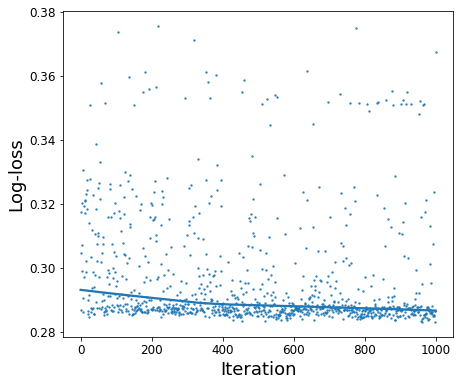

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 6)
sns.regplot(x=results_tpe['index'],
            y=results_tpe['logloss'],
            scatter_kws={'s':2},
            ax=ax,
            ci=None,
            lowess=True)

ax.set_xlabel("Iteration")
ax.set_ylabel("Log-loss")
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels)
plt.show()

The above plot shows how the TPE search algorithm shows a trend towards decreasing log-loss in successive iterations faster than a random search.

In [18]:
results_tpe.logloss.min()

0.2831693027183445

The minimum validation logloss is 0.283 which is estimated from a 5-fold cross validation. We will now retrain the model using the best parameters found, but now with error rate as the evaluation metric to answer the task question.

In [20]:
lgb_train = lgb.Dataset(X, y)

params = {'colsample_bytree': 0.8285468081422601,
         'max_depth': 19,
         'min_data': 13,
         'num_leaves': 38,
         'reg_alpha': 1.0519194197858064,
         'reg_lambda': 15.238431914867787,
         'subsample': 0.5347584384634755,
        'learning_rate': 0.1,
        'objective': 'binary',
        'random_state': 42,
        'n_jobs': -1,
        'verbose':-1,
        'metrics': 'binary_error'
         }

clf = lgb.cv(params=params,
             train_set=lgb_train,
             num_boost_round=10000,
             early_stopping_rounds=30,
             nfold=5,
             stratified=True)

In [24]:
pd.Series(clf['binary_error-mean']).min()

0.1160357858992904

The classifier error is estimated to be 11.6%.

## Section 3

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Hyperparameter tuning library
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
# Gradient boosting library
import lightgbm as lgb
import time

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [2]:
df = pd.read_csv('dataset_Facebook.csv', sep=';')

In [3]:
features = ['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday',
       'Post Hour', 'Paid']

targets = ['Lifetime Post Total Reach',
       'Lifetime Post Total Impressions', 'Lifetime Engaged Users',
       'Lifetime Post Consumers', 'Lifetime Post Consumptions',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page',
       'Lifetime People who have liked your Page and engaged with your post',
       'comment', 'like', 'share', 'Total Interactions']

In [4]:
# Convert categorical to category type for the ligthGBM algorithm
for c in ['Type', 'Category', 'Paid', 'Post Month', 'Post Weekday',
       'Post Hour']:
    df[c] = df[c].astype('category')

Below we are going to use a standardised approach to build a good regression model for each metric and see which metric is the easiest to predict.

The metric used is the mean average percentage error (MAPE) which is good for giving an interpretable comparison between models for non statisticians.

In [10]:
# Dict to store 
results = {}

#Dict to store hyper parameters
results_params = {}

# Dict to store search results
results_tpe = {}

for i in targets:

    y_train = df[i]
    X_train = df[features]

    nulls = pd.isnull(y_train).nonzero()[0]
    y_train = y_train.drop(nulls, axis=0)
    X_train = X_train.drop(nulls, axis=0)

    # object to store results from TPE search
    trials = Trials()

    # Number of model configurations to try
    max_evals = 500

    # Hyperspace to search over
    space = {
        'num_leaves': hp.quniform('num_leaves', 2, 500, 1),
        'reg_alpha': hp.uniform('reg_alpha', 0, 100),
        'reg_lambda': hp.uniform('reg_lambda', 0, 100),
        'subsample': hp.uniform('subsample', 0.6, 1),
        'colsample_bytree': hp.uniform('colsample_bytree', 0.25, 1),
        'min_data': hp.quniform('min_data', 1, 10, 1),
        'max_depth': hp.quniform('max_depth', 1, 8, 1),
        'learning_rate': 0.1,
        'objective': 'mean_absolute_percentage_error',
        'seed': 42,
        'n_jobs':4,
        'verbose':-1,
        'metrics': 'mean_absolute_percentage_error'}

    # scoring function to minimise
    def score(params):

        tcurrent = time.time()

        params = {
            'num_leaves': int(params['num_leaves']),
            'max_depth': int(params['max_depth']),
            'subsample': params['subsample'],
            'colsample_bytree': params['colsample_bytree'],
            'seed': params['seed'],
            'learning_rate': params['learning_rate'],
            'objective': params['objective'],
            'n_jobs': params['n_jobs'],
            'reg_alpha': params['reg_alpha'],
            'reg_lambda': params['reg_lambda'],
            'min_data': int(params['min_data']),
            'verbose': params['verbose'],
            'metrics': params['metrics']
        }

        lgb_train = lgb.Dataset(X_train, y_train)

        clf = lgb.cv(params=params,
                     train_set=lgb_train,
                     num_boost_round=10000,
                     early_stopping_rounds=30,
                     nfold=10,
                     stratified=False)

        mape = pd.Series(clf['mape-mean']).min()

        trees = len(pd.Series(clf['mape-mean'])) + 1

        loss = mape

        print('Run number:', len(trials.results), '/', max_evals,
              "\tmape: ", round(mape, 4),
              "\tTrees: ", round(trees, 4),
              '\tIteration time:', round((time.time() - tcurrent), 2), 'seconds')

        return {'loss': loss, 'status': STATUS_OK, 'mape': mape, 'trees': trees}


    # Initiate the search
    best_params = fmin(score,
                     space,
                     algo=tpe.suggest,
                     trials=trials,
                     max_evals=max_evals)



    results_tpe[i] = pd.DataFrame(trials.results).reset_index()
   
    results[i] = results_tpe[i]['mape'].min()

    results_params[i] = best_params

Run number: 1 / 500 	mape:  0.6698 	Trees:  2 	Iteration time: 0.07 seconds
Run number: 2 / 500 	mape:  0.6698 	Trees:  2 	Iteration time: 0.07 seconds
Run number: 3 / 500 	mape:  0.6698 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 4 / 500 	mape:  0.6698 	Trees:  2 	Iteration time: 0.06 seconds
Run number: 5 / 500 	mape:  0.6698 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 6 / 500 	mape:  0.6698 	Trees:  2 	Iteration time: 0.04 seconds
Run number: 7 / 500 	mape:  0.6698 	Trees:  2 	Iteration time: 0.09 seconds
Run number: 8 / 500 	mape:  0.6698 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 9 / 500 	mape:  0.6698 	Trees:  2 	Iteration time: 0.04 seconds
Run number: 10 / 500 	mape:  0.6698 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 11 / 500 	mape:  0.6698 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 12 / 500 	mape:  0.6698 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 13 / 500 	mape:  0.6698 	Trees:  2 	Iteration time: 0.06 seconds
Run numb

Run number: 108 / 500 	mape:  0.6698 	Trees:  2 	Iteration time: 0.11 seconds
Run number: 109 / 500 	mape:  0.6698 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 110 / 500 	mape:  0.6698 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 111 / 500 	mape:  0.6698 	Trees:  2 	Iteration time: 0.08 seconds
Run number: 112 / 500 	mape:  0.6698 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 113 / 500 	mape:  0.6698 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 114 / 500 	mape:  0.6698 	Trees:  2 	Iteration time: 0.06 seconds
Run number: 115 / 500 	mape:  0.6698 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 116 / 500 	mape:  0.6698 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 117 / 500 	mape:  0.6698 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 118 / 500 	mape:  0.6698 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 119 / 500 	mape:  0.6698 	Trees:  2 	Iteration time: 0.08 seconds
Run number: 120 / 500 	mape:  0.6698 	Trees:  2 	Iteration time:

Run number: 214 / 500 	mape:  0.6698 	Trees:  2 	Iteration time: 0.04 seconds
Run number: 215 / 500 	mape:  0.6698 	Trees:  2 	Iteration time: 0.06 seconds
Run number: 216 / 500 	mape:  0.6698 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 217 / 500 	mape:  0.6698 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 218 / 500 	mape:  0.6698 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 219 / 500 	mape:  0.6698 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 220 / 500 	mape:  0.6698 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 221 / 500 	mape:  0.6698 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 222 / 500 	mape:  0.6698 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 223 / 500 	mape:  0.6698 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 224 / 500 	mape:  0.6698 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 225 / 500 	mape:  0.6698 	Trees:  2 	Iteration time: 0.06 seconds
Run number: 226 / 500 	mape:  0.6698 	Trees:  2 	Iteration time:

Run number: 320 / 500 	mape:  0.6698 	Trees:  2 	Iteration time: 0.11 seconds
Run number: 321 / 500 	mape:  0.6698 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 322 / 500 	mape:  0.6698 	Trees:  2 	Iteration time: 0.06 seconds
Run number: 323 / 500 	mape:  0.6698 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 324 / 500 	mape:  0.6698 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 325 / 500 	mape:  0.6698 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 326 / 500 	mape:  0.6698 	Trees:  2 	Iteration time: 0.06 seconds
Run number: 327 / 500 	mape:  0.6698 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 328 / 500 	mape:  0.6698 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 329 / 500 	mape:  0.6698 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 330 / 500 	mape:  0.6698 	Trees:  2 	Iteration time: 0.04 seconds
Run number: 331 / 500 	mape:  0.6698 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 332 / 500 	mape:  0.6698 	Trees:  2 	Iteration time:

Run number: 426 / 500 	mape:  0.6698 	Trees:  2 	Iteration time: 0.07 seconds
Run number: 427 / 500 	mape:  0.6698 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 428 / 500 	mape:  0.6698 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 429 / 500 	mape:  0.6698 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 430 / 500 	mape:  0.6698 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 431 / 500 	mape:  0.6698 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 432 / 500 	mape:  0.6698 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 433 / 500 	mape:  0.6698 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 434 / 500 	mape:  0.6698 	Trees:  2 	Iteration time: 0.07 seconds
Run number: 435 / 500 	mape:  0.6698 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 436 / 500 	mape:  0.6698 	Trees:  2 	Iteration time: 0.06 seconds
Run number: 437 / 500 	mape:  0.6698 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 438 / 500 	mape:  0.6698 	Trees:  2 	Iteration time:

Run number: 32 / 500 	mape:  0.6522 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 33 / 500 	mape:  0.6522 	Trees:  2 	Iteration time: 0.06 seconds
Run number: 34 / 500 	mape:  0.6522 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 35 / 500 	mape:  0.6522 	Trees:  2 	Iteration time: 0.08 seconds
Run number: 36 / 500 	mape:  0.6522 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 37 / 500 	mape:  0.6522 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 38 / 500 	mape:  0.6522 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 39 / 500 	mape:  0.6522 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 40 / 500 	mape:  0.6522 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 41 / 500 	mape:  0.6522 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 42 / 500 	mape:  0.6522 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 43 / 500 	mape:  0.6522 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 44 / 500 	mape:  0.6522 	Trees:  2 	Iteration time: 0.03 seconds

Run number: 139 / 500 	mape:  0.6522 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 140 / 500 	mape:  0.6522 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 141 / 500 	mape:  0.6522 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 142 / 500 	mape:  0.6522 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 143 / 500 	mape:  0.6522 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 144 / 500 	mape:  0.6522 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 145 / 500 	mape:  0.6522 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 146 / 500 	mape:  0.6522 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 147 / 500 	mape:  0.6522 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 148 / 500 	mape:  0.6522 	Trees:  2 	Iteration time: 0.08 seconds
Run number: 149 / 500 	mape:  0.6522 	Trees:  2 	Iteration time: 0.06 seconds
Run number: 150 / 500 	mape:  0.6522 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 151 / 500 	mape:  0.6522 	Trees:  2 	Iteration time:

Run number: 246 / 500 	mape:  0.6522 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 247 / 500 	mape:  0.6522 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 248 / 500 	mape:  0.6522 	Trees:  2 	Iteration time: 0.06 seconds
Run number: 249 / 500 	mape:  0.6522 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 250 / 500 	mape:  0.6522 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 251 / 500 	mape:  0.6522 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 252 / 500 	mape:  0.6522 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 253 / 500 	mape:  0.6522 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 254 / 500 	mape:  0.6522 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 255 / 500 	mape:  0.6522 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 256 / 500 	mape:  0.6522 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 257 / 500 	mape:  0.6522 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 258 / 500 	mape:  0.6522 	Trees:  2 	Iteration time:

Run number: 352 / 500 	mape:  0.6522 	Trees:  2 	Iteration time: 0.07 seconds
Run number: 353 / 500 	mape:  0.6522 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 354 / 500 	mape:  0.6522 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 355 / 500 	mape:  0.6522 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 356 / 500 	mape:  0.6522 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 357 / 500 	mape:  0.6522 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 358 / 500 	mape:  0.6522 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 359 / 500 	mape:  0.6522 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 360 / 500 	mape:  0.6522 	Trees:  2 	Iteration time: 0.04 seconds
Run number: 361 / 500 	mape:  0.6522 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 362 / 500 	mape:  0.6522 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 363 / 500 	mape:  0.6522 	Trees:  2 	Iteration time: 0.02 seconds
Run number: 364 / 500 	mape:  0.6522 	Trees:  2 	Iteration time:

Run number: 458 / 500 	mape:  0.6522 	Trees:  2 	Iteration time: 0.06 seconds
Run number: 459 / 500 	mape:  0.6522 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 460 / 500 	mape:  0.6522 	Trees:  2 	Iteration time: 0.07 seconds
Run number: 461 / 500 	mape:  0.6522 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 462 / 500 	mape:  0.6522 	Trees:  2 	Iteration time: 0.07 seconds
Run number: 463 / 500 	mape:  0.6522 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 464 / 500 	mape:  0.6522 	Trees:  2 	Iteration time: 0.11 seconds
Run number: 465 / 500 	mape:  0.6522 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 466 / 500 	mape:  0.6522 	Trees:  2 	Iteration time: 0.06 seconds
Run number: 467 / 500 	mape:  0.6522 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 468 / 500 	mape:  0.6522 	Trees:  2 	Iteration time: 0.06 seconds
Run number: 469 / 500 	mape:  0.6522 	Trees:  2 	Iteration time: 0.06 seconds
Run number: 470 / 500 	mape:  0.6522 	Trees:  2 	Iteration time:

Run number: 66 / 500 	mape:  0.8006 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 67 / 500 	mape:  0.8006 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 68 / 500 	mape:  0.8006 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 69 / 500 	mape:  0.8006 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 70 / 500 	mape:  0.8006 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 71 / 500 	mape:  0.8006 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 72 / 500 	mape:  0.8006 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 73 / 500 	mape:  0.8006 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 74 / 500 	mape:  0.8006 	Trees:  2 	Iteration time: 0.08 seconds
Run number: 75 / 500 	mape:  0.8006 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 76 / 500 	mape:  0.8006 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 77 / 500 	mape:  0.8006 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 78 / 500 	mape:  0.8006 	Trees:  2 	Iteration time: 0.03 seconds

Run number: 173 / 500 	mape:  0.6534 	Trees:  15 	Iteration time: 0.14 seconds
Run number: 174 / 500 	mape:  0.8006 	Trees:  2 	Iteration time: 0.06 seconds
Run number: 175 / 500 	mape:  0.8006 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 176 / 500 	mape:  0.8006 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 177 / 500 	mape:  0.8006 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 178 / 500 	mape:  0.8006 	Trees:  2 	Iteration time: 0.07 seconds
Run number: 179 / 500 	mape:  0.8006 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 180 / 500 	mape:  0.8006 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 181 / 500 	mape:  0.8006 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 182 / 500 	mape:  0.8006 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 183 / 500 	mape:  0.8006 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 184 / 500 	mape:  0.8006 	Trees:  2 	Iteration time: 0.09 seconds
Run number: 185 / 500 	mape:  0.8006 	Trees:  2 	Iteration time

Run number: 278 / 500 	mape:  0.8006 	Trees:  2 	Iteration time: 0.04 seconds
Run number: 279 / 500 	mape:  0.8006 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 280 / 500 	mape:  0.8006 	Trees:  2 	Iteration time: 0.04 seconds
Run number: 281 / 500 	mape:  0.6089 	Trees:  21 	Iteration time: 0.09 seconds
Run number: 282 / 500 	mape:  0.8006 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 283 / 500 	mape:  0.8006 	Trees:  2 	Iteration time: 0.09 seconds
Run number: 284 / 500 	mape:  0.8006 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 285 / 500 	mape:  0.8006 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 286 / 500 	mape:  0.8006 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 287 / 500 	mape:  0.8006 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 288 / 500 	mape:  0.8006 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 289 / 500 	mape:  0.5998 	Trees:  40 	Iteration time: 0.13 seconds
Run number: 290 / 500 	mape:  0.8006 	Trees:  2 	Iteration tim

Run number: 383 / 500 	mape:  0.8006 	Trees:  2 	Iteration time: 0.06 seconds
Run number: 384 / 500 	mape:  0.8006 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 385 / 500 	mape:  0.6455 	Trees:  27 	Iteration time: 0.11 seconds
Run number: 386 / 500 	mape:  0.8006 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 387 / 500 	mape:  0.8006 	Trees:  2 	Iteration time: 0.04 seconds
Run number: 388 / 500 	mape:  0.8006 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 389 / 500 	mape:  0.8006 	Trees:  2 	Iteration time: 0.07 seconds
Run number: 390 / 500 	mape:  0.8006 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 391 / 500 	mape:  0.8006 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 392 / 500 	mape:  0.8006 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 393 / 500 	mape:  0.8006 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 394 / 500 	mape:  0.8006 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 395 / 500 	mape:  0.6319 	Trees:  45 	Iteration tim

Run number: 489 / 500 	mape:  0.8006 	Trees:  2 	Iteration time: 0.04 seconds
Run number: 490 / 500 	mape:  0.8006 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 491 / 500 	mape:  0.8006 	Trees:  2 	Iteration time: 0.07 seconds
Run number: 492 / 500 	mape:  0.8006 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 493 / 500 	mape:  0.8006 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 494 / 500 	mape:  0.8006 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 495 / 500 	mape:  0.8006 	Trees:  2 	Iteration time: 0.06 seconds
Run number: 496 / 500 	mape:  0.8006 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 497 / 500 	mape:  0.8006 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 498 / 500 	mape:  0.8006 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 499 / 500 	mape:  0.8006 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 500 / 500 	mape:  0.8006 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 1 / 500 	mape:  0.7748 	Trees:  2 	Iteration time: 0

Run number: 98 / 500 	mape:  0.7748 	Trees:  2 	Iteration time: 0.04 seconds
Run number: 99 / 500 	mape:  0.7748 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 100 / 500 	mape:  0.7748 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 101 / 500 	mape:  0.7748 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 102 / 500 	mape:  0.7748 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 103 / 500 	mape:  0.7748 	Trees:  2 	Iteration time: 0.08 seconds
Run number: 104 / 500 	mape:  0.7748 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 105 / 500 	mape:  0.7748 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 106 / 500 	mape:  0.7748 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 107 / 500 	mape:  0.7748 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 108 / 500 	mape:  0.7748 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 109 / 500 	mape:  0.7748 	Trees:  2 	Iteration time: 0.06 seconds
Run number: 110 / 500 	mape:  0.7748 	Trees:  2 	Iteration time: 0

Run number: 205 / 500 	mape:  0.7748 	Trees:  2 	Iteration time: 0.09 seconds
Run number: 206 / 500 	mape:  0.7748 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 207 / 500 	mape:  0.7748 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 208 / 500 	mape:  0.7748 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 209 / 500 	mape:  0.7748 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 210 / 500 	mape:  0.7748 	Trees:  2 	Iteration time: 0.07 seconds
Run number: 211 / 500 	mape:  0.7748 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 212 / 500 	mape:  0.7748 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 213 / 500 	mape:  0.7748 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 214 / 500 	mape:  0.7748 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 215 / 500 	mape:  0.7748 	Trees:  2 	Iteration time: 0.08 seconds
Run number: 216 / 500 	mape:  0.7748 	Trees:  2 	Iteration time: 0.06 seconds
Run number: 217 / 500 	mape:  0.7748 	Trees:  2 	Iteration time:

Run number: 311 / 500 	mape:  0.5577 	Trees:  38 	Iteration time: 0.13 seconds
Run number: 312 / 500 	mape:  0.7748 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 313 / 500 	mape:  0.7748 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 314 / 500 	mape:  0.7748 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 315 / 500 	mape:  0.7748 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 316 / 500 	mape:  0.7748 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 317 / 500 	mape:  0.7748 	Trees:  2 	Iteration time: 0.04 seconds
Run number: 318 / 500 	mape:  0.7748 	Trees:  2 	Iteration time: 0.06 seconds
Run number: 319 / 500 	mape:  0.7748 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 320 / 500 	mape:  0.7748 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 321 / 500 	mape:  0.5954 	Trees:  56 	Iteration time: 0.16 seconds
Run number: 322 / 500 	mape:  0.7748 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 323 / 500 	mape:  0.7748 	Trees:  2 	Iteration tim

Run number: 417 / 500 	mape:  0.7748 	Trees:  2 	Iteration time: 0.07 seconds
Run number: 418 / 500 	mape:  0.58 	Trees:  32 	Iteration time: 0.09 seconds
Run number: 419 / 500 	mape:  0.7748 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 420 / 500 	mape:  0.7748 	Trees:  2 	Iteration time: 0.04 seconds
Run number: 421 / 500 	mape:  0.7748 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 422 / 500 	mape:  0.5838 	Trees:  86 	Iteration time: 0.12 seconds
Run number: 423 / 500 	mape:  0.7748 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 424 / 500 	mape:  0.7748 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 425 / 500 	mape:  0.7748 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 426 / 500 	mape:  0.7748 	Trees:  2 	Iteration time: 0.04 seconds
Run number: 427 / 500 	mape:  0.7748 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 428 / 500 	mape:  0.7748 	Trees:  2 	Iteration time: 0.07 seconds
Run number: 429 / 500 	mape:  0.5853 	Trees:  38 	Iteration time

Run number: 23 / 500 	mape:  0.8416 	Trees:  2 	Iteration time: 0.06 seconds
Run number: 24 / 500 	mape:  0.8416 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 25 / 500 	mape:  0.8416 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 26 / 500 	mape:  0.8416 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 27 / 500 	mape:  0.8416 	Trees:  2 	Iteration time: 0.11 seconds
Run number: 28 / 500 	mape:  0.8416 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 29 / 500 	mape:  0.8416 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 30 / 500 	mape:  0.8416 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 31 / 500 	mape:  0.8416 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 32 / 500 	mape:  0.8416 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 33 / 500 	mape:  0.8416 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 34 / 500 	mape:  0.8416 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 35 / 500 	mape:  0.8416 	Trees:  2 	Iteration time: 0.05 seconds

Run number: 130 / 500 	mape:  0.6725 	Trees:  17 	Iteration time: 0.06 seconds
Run number: 131 / 500 	mape:  0.8416 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 132 / 500 	mape:  0.8416 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 133 / 500 	mape:  0.8416 	Trees:  2 	Iteration time: 0.07 seconds
Run number: 134 / 500 	mape:  0.8416 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 135 / 500 	mape:  0.8416 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 136 / 500 	mape:  0.8416 	Trees:  2 	Iteration time: 0.04 seconds
Run number: 137 / 500 	mape:  0.8416 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 138 / 500 	mape:  0.8416 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 139 / 500 	mape:  0.8416 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 140 / 500 	mape:  0.8416 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 141 / 500 	mape:  0.8416 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 142 / 500 	mape:  0.8416 	Trees:  2 	Iteration time

Run number: 235 / 500 	mape:  0.8416 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 236 / 500 	mape:  0.8416 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 237 / 500 	mape:  0.8416 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 238 / 500 	mape:  0.8416 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 239 / 500 	mape:  0.8416 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 240 / 500 	mape:  0.8416 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 241 / 500 	mape:  0.8416 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 242 / 500 	mape:  0.8416 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 243 / 500 	mape:  0.8416 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 244 / 500 	mape:  0.8416 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 245 / 500 	mape:  0.8416 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 246 / 500 	mape:  0.8416 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 247 / 500 	mape:  0.6775 	Trees:  24 	Iteration time

Run number: 341 / 500 	mape:  0.8416 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 342 / 500 	mape:  0.8416 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 343 / 500 	mape:  0.8416 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 344 / 500 	mape:  0.8416 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 345 / 500 	mape:  0.8416 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 346 / 500 	mape:  0.8416 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 347 / 500 	mape:  0.6562 	Trees:  22 	Iteration time: 0.08 seconds
Run number: 348 / 500 	mape:  0.8416 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 349 / 500 	mape:  0.8416 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 350 / 500 	mape:  0.8416 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 351 / 500 	mape:  0.8416 	Trees:  2 	Iteration time: 0.06 seconds
Run number: 352 / 500 	mape:  0.8416 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 353 / 500 	mape:  0.8416 	Trees:  2 	Iteration time

Run number: 446 / 500 	mape:  0.8416 	Trees:  2 	Iteration time: 0.06 seconds
Run number: 447 / 500 	mape:  0.8416 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 448 / 500 	mape:  0.648 	Trees:  20 	Iteration time: 0.11 seconds
Run number: 449 / 500 	mape:  0.8416 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 450 / 500 	mape:  0.8416 	Trees:  2 	Iteration time: 0.08 seconds
Run number: 451 / 500 	mape:  0.8416 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 452 / 500 	mape:  0.8416 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 453 / 500 	mape:  0.6742 	Trees:  15 	Iteration time: 0.08 seconds
Run number: 454 / 500 	mape:  0.8416 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 455 / 500 	mape:  0.8416 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 456 / 500 	mape:  0.8416 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 457 / 500 	mape:  0.8416 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 458 / 500 	mape:  0.8416 	Trees:  2 	Iteration time

Run number: 53 / 500 	mape:  0.5973 	Trees:  2 	Iteration time: 0.06 seconds
Run number: 54 / 500 	mape:  0.5973 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 55 / 500 	mape:  0.5973 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 56 / 500 	mape:  0.5973 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 57 / 500 	mape:  0.5973 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 58 / 500 	mape:  0.5973 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 59 / 500 	mape:  0.5973 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 60 / 500 	mape:  0.5973 	Trees:  2 	Iteration time: 0.06 seconds
Run number: 61 / 500 	mape:  0.5973 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 62 / 500 	mape:  0.5973 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 63 / 500 	mape:  0.5973 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 64 / 500 	mape:  0.5973 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 65 / 500 	mape:  0.5973 	Trees:  2 	Iteration time: 0.06 seconds

Run number: 160 / 500 	mape:  0.5973 	Trees:  2 	Iteration time: 0.08 seconds
Run number: 161 / 500 	mape:  0.5973 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 162 / 500 	mape:  0.5973 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 163 / 500 	mape:  0.5973 	Trees:  2 	Iteration time: 0.06 seconds
Run number: 164 / 500 	mape:  0.5973 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 165 / 500 	mape:  0.5973 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 166 / 500 	mape:  0.5973 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 167 / 500 	mape:  0.5973 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 168 / 500 	mape:  0.5973 	Trees:  2 	Iteration time: 0.07 seconds
Run number: 169 / 500 	mape:  0.5973 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 170 / 500 	mape:  0.5973 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 171 / 500 	mape:  0.5973 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 172 / 500 	mape:  0.5973 	Trees:  2 	Iteration time:

Run number: 267 / 500 	mape:  0.5973 	Trees:  2 	Iteration time: 0.06 seconds
Run number: 268 / 500 	mape:  0.5973 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 269 / 500 	mape:  0.5973 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 270 / 500 	mape:  0.5973 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 271 / 500 	mape:  0.5973 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 272 / 500 	mape:  0.5973 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 273 / 500 	mape:  0.5973 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 274 / 500 	mape:  0.5973 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 275 / 500 	mape:  0.5973 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 276 / 500 	mape:  0.5973 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 277 / 500 	mape:  0.5973 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 278 / 500 	mape:  0.5973 	Trees:  2 	Iteration time: 0.06 seconds
Run number: 279 / 500 	mape:  0.5973 	Trees:  2 	Iteration time:

Run number: 373 / 500 	mape:  0.5973 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 374 / 500 	mape:  0.5973 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 375 / 500 	mape:  0.5973 	Trees:  2 	Iteration time: 0.08 seconds
Run number: 376 / 500 	mape:  0.5973 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 377 / 500 	mape:  0.5973 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 378 / 500 	mape:  0.5973 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 379 / 500 	mape:  0.5973 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 380 / 500 	mape:  0.5973 	Trees:  2 	Iteration time: 0.06 seconds
Run number: 381 / 500 	mape:  0.5973 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 382 / 500 	mape:  0.5973 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 383 / 500 	mape:  0.5973 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 384 / 500 	mape:  0.5973 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 385 / 500 	mape:  0.5973 	Trees:  2 	Iteration time:

Run number: 479 / 500 	mape:  0.5973 	Trees:  2 	Iteration time: 0.11 seconds
Run number: 480 / 500 	mape:  0.5973 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 481 / 500 	mape:  0.5973 	Trees:  2 	Iteration time: 0.06 seconds
Run number: 482 / 500 	mape:  0.5973 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 483 / 500 	mape:  0.5973 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 484 / 500 	mape:  0.5973 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 485 / 500 	mape:  0.5973 	Trees:  2 	Iteration time: 0.06 seconds
Run number: 486 / 500 	mape:  0.5973 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 487 / 500 	mape:  0.5973 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 488 / 500 	mape:  0.5973 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 489 / 500 	mape:  0.5973 	Trees:  2 	Iteration time: 0.06 seconds
Run number: 490 / 500 	mape:  0.5973 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 491 / 500 	mape:  0.5973 	Trees:  2 	Iteration time:

Run number: 88 / 500 	mape:  0.6092 	Trees:  2 	Iteration time: 0.09 seconds
Run number: 89 / 500 	mape:  0.6092 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 90 / 500 	mape:  0.6092 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 91 / 500 	mape:  0.6092 	Trees:  2 	Iteration time: 0.06 seconds
Run number: 92 / 500 	mape:  0.6092 	Trees:  2 	Iteration time: 0.33 seconds
Run number: 93 / 500 	mape:  0.6092 	Trees:  2 	Iteration time: 0.09 seconds
Run number: 94 / 500 	mape:  0.6092 	Trees:  2 	Iteration time: 0.1 seconds
Run number: 95 / 500 	mape:  0.6092 	Trees:  2 	Iteration time: 0.08 seconds
Run number: 96 / 500 	mape:  0.6092 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 97 / 500 	mape:  0.6092 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 98 / 500 	mape:  0.6092 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 99 / 500 	mape:  0.6092 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 100 / 500 	mape:  0.6092 	Trees:  2 	Iteration time: 0.06 seconds

Run number: 193 / 500 	mape:  0.6092 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 194 / 500 	mape:  0.6092 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 195 / 500 	mape:  0.6092 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 196 / 500 	mape:  0.6092 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 197 / 500 	mape:  0.6092 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 198 / 500 	mape:  0.6092 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 199 / 500 	mape:  0.6092 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 200 / 500 	mape:  0.6092 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 201 / 500 	mape:  0.6092 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 202 / 500 	mape:  0.6092 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 203 / 500 	mape:  0.6092 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 204 / 500 	mape:  0.6092 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 205 / 500 	mape:  0.6092 	Trees:  2 	Iteration time:

Run number: 300 / 500 	mape:  0.6092 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 301 / 500 	mape:  0.6092 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 302 / 500 	mape:  0.6092 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 303 / 500 	mape:  0.6092 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 304 / 500 	mape:  0.6092 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 305 / 500 	mape:  0.6092 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 306 / 500 	mape:  0.6092 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 307 / 500 	mape:  0.6092 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 308 / 500 	mape:  0.6092 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 309 / 500 	mape:  0.6092 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 310 / 500 	mape:  0.6092 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 311 / 500 	mape:  0.6092 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 312 / 500 	mape:  0.6092 	Trees:  2 	Iteration time:

Run number: 408 / 500 	mape:  0.6092 	Trees:  2 	Iteration time: 0.06 seconds
Run number: 409 / 500 	mape:  0.6092 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 410 / 500 	mape:  0.6092 	Trees:  2 	Iteration time: 0.06 seconds
Run number: 411 / 500 	mape:  0.6092 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 412 / 500 	mape:  0.6092 	Trees:  2 	Iteration time: 0.06 seconds
Run number: 413 / 500 	mape:  0.6092 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 414 / 500 	mape:  0.6092 	Trees:  2 	Iteration time: 0.06 seconds
Run number: 415 / 500 	mape:  0.6092 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 416 / 500 	mape:  0.6092 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 417 / 500 	mape:  0.6092 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 418 / 500 	mape:  0.6092 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 419 / 500 	mape:  0.6092 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 420 / 500 	mape:  0.6092 	Trees:  2 	Iteration time:

Run number: 16 / 500 	mape:  0.7109 	Trees:  2 	Iteration time: 0.04 seconds
Run number: 17 / 500 	mape:  0.7109 	Trees:  2 	Iteration time: 0.07 seconds
Run number: 18 / 500 	mape:  0.7109 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 19 / 500 	mape:  0.7109 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 20 / 500 	mape:  0.7109 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 21 / 500 	mape:  0.7109 	Trees:  2 	Iteration time: 0.06 seconds
Run number: 22 / 500 	mape:  0.5947 	Trees:  23 	Iteration time: 0.06 seconds
Run number: 23 / 500 	mape:  0.7109 	Trees:  2 	Iteration time: 0.08 seconds
Run number: 24 / 500 	mape:  0.5396 	Trees:  52 	Iteration time: 0.12 seconds
Run number: 25 / 500 	mape:  0.7109 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 26 / 500 	mape:  0.7109 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 27 / 500 	mape:  0.7109 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 28 / 500 	mape:  0.7109 	Trees:  2 	Iteration time: 0.05 secon

Run number: 123 / 500 	mape:  0.7109 	Trees:  2 	Iteration time: 0.06 seconds
Run number: 124 / 500 	mape:  0.7109 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 125 / 500 	mape:  0.7109 	Trees:  2 	Iteration time: 0.08 seconds
Run number: 126 / 500 	mape:  0.7109 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 127 / 500 	mape:  0.7109 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 128 / 500 	mape:  0.7109 	Trees:  2 	Iteration time: 0.12 seconds
Run number: 129 / 500 	mape:  0.7109 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 130 / 500 	mape:  0.5572 	Trees:  23 	Iteration time: 0.14 seconds
Run number: 131 / 500 	mape:  0.7109 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 132 / 500 	mape:  0.7109 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 133 / 500 	mape:  0.7109 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 134 / 500 	mape:  0.7109 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 135 / 500 	mape:  0.7109 	Trees:  2 	Iteration time

Run number: 229 / 500 	mape:  0.7109 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 230 / 500 	mape:  0.7109 	Trees:  2 	Iteration time: 0.07 seconds
Run number: 231 / 500 	mape:  0.5779 	Trees:  14 	Iteration time: 0.11 seconds
Run number: 232 / 500 	mape:  0.7109 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 233 / 500 	mape:  0.7109 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 234 / 500 	mape:  0.7109 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 235 / 500 	mape:  0.7109 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 236 / 500 	mape:  0.7109 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 237 / 500 	mape:  0.7109 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 238 / 500 	mape:  0.7109 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 239 / 500 	mape:  0.5722 	Trees:  51 	Iteration time: 0.09 seconds
Run number: 240 / 500 	mape:  0.7109 	Trees:  2 	Iteration time: 0.06 seconds
Run number: 241 / 500 	mape:  0.7109 	Trees:  2 	Iteration tim

Run number: 334 / 500 	mape:  0.7109 	Trees:  2 	Iteration time: 0.06 seconds
Run number: 335 / 500 	mape:  0.7109 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 336 / 500 	mape:  0.7109 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 337 / 500 	mape:  0.7109 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 338 / 500 	mape:  0.7109 	Trees:  2 	Iteration time: 0.06 seconds
Run number: 339 / 500 	mape:  0.7109 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 340 / 500 	mape:  0.7109 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 341 / 500 	mape:  0.7109 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 342 / 500 	mape:  0.7109 	Trees:  2 	Iteration time: 0.04 seconds
Run number: 343 / 500 	mape:  0.5582 	Trees:  30 	Iteration time: 0.06 seconds
Run number: 344 / 500 	mape:  0.7109 	Trees:  2 	Iteration time: 0.06 seconds
Run number: 345 / 500 	mape:  0.7109 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 346 / 500 	mape:  0.7109 	Trees:  2 	Iteration time

Run number: 440 / 500 	mape:  0.7109 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 441 / 500 	mape:  0.7122 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 442 / 500 	mape:  0.7109 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 443 / 500 	mape:  0.5471 	Trees:  50 	Iteration time: 0.11 seconds
Run number: 444 / 500 	mape:  0.7109 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 445 / 500 	mape:  0.7109 	Trees:  2 	Iteration time: 0.11 seconds
Run number: 446 / 500 	mape:  0.7109 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 447 / 500 	mape:  0.7109 	Trees:  2 	Iteration time: 0.06 seconds
Run number: 448 / 500 	mape:  0.7109 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 449 / 500 	mape:  0.7109 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 450 / 500 	mape:  0.7109 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 451 / 500 	mape:  0.56 	Trees:  23 	Iteration time: 0.13 seconds
Run number: 452 / 500 	mape:  0.7109 	Trees:  2 	Iteration time:

Run number: 48 / 500 	mape:  0.699 	Trees:  42 	Iteration time: 0.11 seconds
Run number: 49 / 500 	mape:  0.6946 	Trees:  38 	Iteration time: 0.06 seconds
Run number: 50 / 500 	mape:  0.7207 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 51 / 500 	mape:  0.7207 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 52 / 500 	mape:  0.7207 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 53 / 500 	mape:  0.7207 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 54 / 500 	mape:  0.7207 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 55 / 500 	mape:  0.6961 	Trees:  78 	Iteration time: 0.14 seconds
Run number: 56 / 500 	mape:  0.6963 	Trees:  36 	Iteration time: 0.16 seconds
Run number: 57 / 500 	mape:  0.6968 	Trees:  39 	Iteration time: 0.09 seconds
Run number: 58 / 500 	mape:  0.7207 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 59 / 500 	mape:  0.7157 	Trees:  4 	Iteration time: 0.07 seconds
Run number: 60 / 500 	mape:  0.7207 	Trees:  2 	Iteration time: 0.05 sec

Run number: 155 / 500 	mape:  0.6928 	Trees:  38 	Iteration time: 0.13 seconds
Run number: 156 / 500 	mape:  0.6933 	Trees:  76 	Iteration time: 0.11 seconds
Run number: 157 / 500 	mape:  0.6937 	Trees:  29 	Iteration time: 0.1 seconds
Run number: 158 / 500 	mape:  0.6988 	Trees:  34 	Iteration time: 0.11 seconds
Run number: 159 / 500 	mape:  0.6859 	Trees:  47 	Iteration time: 0.1 seconds
Run number: 160 / 500 	mape:  0.7217 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 161 / 500 	mape:  0.7069 	Trees:  17 	Iteration time: 0.05 seconds
Run number: 162 / 500 	mape:  0.7016 	Trees:  33 	Iteration time: 0.07 seconds
Run number: 163 / 500 	mape:  0.695 	Trees:  47 	Iteration time: 0.08 seconds
Run number: 164 / 500 	mape:  0.6954 	Trees:  48 	Iteration time: 0.11 seconds
Run number: 165 / 500 	mape:  0.7159 	Trees:  14 	Iteration time: 0.05 seconds
Run number: 166 / 500 	mape:  0.7169 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 167 / 500 	mape:  0.7195 	Trees:  2 	Iteratio

Run number: 260 / 500 	mape:  0.6902 	Trees:  22 	Iteration time: 0.12 seconds
Run number: 261 / 500 	mape:  0.6985 	Trees:  29 	Iteration time: 0.13 seconds
Run number: 262 / 500 	mape:  0.6881 	Trees:  22 	Iteration time: 0.14 seconds
Run number: 263 / 500 	mape:  0.7054 	Trees:  19 	Iteration time: 0.11 seconds
Run number: 264 / 500 	mape:  0.6953 	Trees:  28 	Iteration time: 0.12 seconds
Run number: 265 / 500 	mape:  0.7014 	Trees:  14 	Iteration time: 0.09 seconds
Run number: 266 / 500 	mape:  0.6922 	Trees:  28 	Iteration time: 0.1 seconds
Run number: 267 / 500 	mape:  0.7059 	Trees:  29 	Iteration time: 0.06 seconds
Run number: 268 / 500 	mape:  0.6877 	Trees:  36 	Iteration time: 0.13 seconds
Run number: 269 / 500 	mape:  0.6878 	Trees:  47 	Iteration time: 0.08 seconds
Run number: 270 / 500 	mape:  0.6957 	Trees:  38 	Iteration time: 0.1 seconds
Run number: 271 / 500 	mape:  0.7003 	Trees:  34 	Iteration time: 0.06 seconds
Run number: 272 / 500 	mape:  0.6989 	Trees:  13 	Iter

Run number: 365 / 500 	mape:  0.6951 	Trees:  31 	Iteration time: 0.11 seconds
Run number: 366 / 500 	mape:  0.702 	Trees:  34 	Iteration time: 0.08 seconds
Run number: 367 / 500 	mape:  0.7207 	Trees:  2 	Iteration time: 0.07 seconds
Run number: 368 / 500 	mape:  0.6922 	Trees:  37 	Iteration time: 0.08 seconds
Run number: 369 / 500 	mape:  0.6957 	Trees:  40 	Iteration time: 0.08 seconds
Run number: 370 / 500 	mape:  0.7207 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 371 / 500 	mape:  0.6912 	Trees:  21 	Iteration time: 0.06 seconds
Run number: 372 / 500 	mape:  0.6955 	Trees:  37 	Iteration time: 0.13 seconds
Run number: 373 / 500 	mape:  0.7175 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 374 / 500 	mape:  0.6934 	Trees:  42 	Iteration time: 0.09 seconds
Run number: 375 / 500 	mape:  0.6968 	Trees:  56 	Iteration time: 0.09 seconds
Run number: 376 / 500 	mape:  0.6996 	Trees:  42 	Iteration time: 0.12 seconds
Run number: 377 / 500 	mape:  0.6932 	Trees:  33 	Iterat

Run number: 470 / 500 	mape:  0.697 	Trees:  22 	Iteration time: 0.06 seconds
Run number: 471 / 500 	mape:  0.6879 	Trees:  27 	Iteration time: 0.17 seconds
Run number: 472 / 500 	mape:  0.7134 	Trees:  14 	Iteration time: 0.05 seconds
Run number: 473 / 500 	mape:  0.7158 	Trees:  2 	Iteration time: 0.06 seconds
Run number: 474 / 500 	mape:  0.6922 	Trees:  40 	Iteration time: 0.09 seconds
Run number: 475 / 500 	mape:  0.6924 	Trees:  22 	Iteration time: 0.11 seconds
Run number: 476 / 500 	mape:  0.6985 	Trees:  14 	Iteration time: 0.11 seconds
Run number: 477 / 500 	mape:  0.6949 	Trees:  22 	Iteration time: 0.06 seconds
Run number: 478 / 500 	mape:  0.7045 	Trees:  23 	Iteration time: 0.09 seconds
Run number: 479 / 500 	mape:  0.6951 	Trees:  47 	Iteration time: 0.09 seconds
Run number: 480 / 500 	mape:  0.7056 	Trees:  21 	Iteration time: 0.05 seconds
Run number: 481 / 500 	mape:  0.6979 	Trees:  54 	Iteration time: 0.12 seconds
Run number: 482 / 500 	mape:  0.6938 	Trees:  48 	Iter

Run number: 77 / 500 	mape:  0.9656 	Trees:  2 	Iteration time: 0.04 seconds
Run number: 78 / 500 	mape:  0.9656 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 79 / 500 	mape:  0.9656 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 80 / 500 	mape:  0.8875 	Trees:  32 	Iteration time: 0.12 seconds
Run number: 81 / 500 	mape:  0.9656 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 82 / 500 	mape:  0.9192 	Trees:  14 	Iteration time: 0.05 seconds
Run number: 83 / 500 	mape:  0.9656 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 84 / 500 	mape:  0.9656 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 85 / 500 	mape:  0.9656 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 86 / 500 	mape:  0.9656 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 87 / 500 	mape:  0.9656 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 88 / 500 	mape:  0.9656 	Trees:  2 	Iteration time: 0.08 seconds
Run number: 89 / 500 	mape:  0.9656 	Trees:  2 	Iteration time: 0.05 secon

Run number: 184 / 500 	mape:  0.9656 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 185 / 500 	mape:  0.9411 	Trees:  20 	Iteration time: 0.08 seconds
Run number: 186 / 500 	mape:  0.9656 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 187 / 500 	mape:  0.9656 	Trees:  2 	Iteration time: 0.06 seconds
Run number: 188 / 500 	mape:  0.8467 	Trees:  15 	Iteration time: 0.12 seconds
Run number: 189 / 500 	mape:  0.9656 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 190 / 500 	mape:  0.9656 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 191 / 500 	mape:  0.9656 	Trees:  2 	Iteration time: 0.06 seconds
Run number: 192 / 500 	mape:  0.9656 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 193 / 500 	mape:  0.9656 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 194 / 500 	mape:  0.8766 	Trees:  113 	Iteration time: 0.22 seconds
Run number: 195 / 500 	mape:  0.9656 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 196 / 500 	mape:  0.9656 	Trees:  2 	Iteration t

Run number: 290 / 500 	mape:  0.9656 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 291 / 500 	mape:  0.9656 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 292 / 500 	mape:  0.9004 	Trees:  39 	Iteration time: 0.06 seconds
Run number: 293 / 500 	mape:  0.9656 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 294 / 500 	mape:  0.9656 	Trees:  2 	Iteration time: 0.04 seconds
Run number: 295 / 500 	mape:  0.9656 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 296 / 500 	mape:  0.8004 	Trees:  109 	Iteration time: 0.16 seconds
Run number: 297 / 500 	mape:  0.9656 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 298 / 500 	mape:  0.9656 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 299 / 500 	mape:  0.9656 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 300 / 500 	mape:  0.9656 	Trees:  2 	Iteration time: 0.04 seconds
Run number: 301 / 500 	mape:  0.8652 	Trees:  55 	Iteration time: 0.12 seconds
Run number: 302 / 500 	mape:  0.9656 	Trees:  2 	Iteration t

Run number: 396 / 500 	mape:  0.9656 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 397 / 500 	mape:  0.9656 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 398 / 500 	mape:  0.9656 	Trees:  2 	Iteration time: 0.06 seconds
Run number: 399 / 500 	mape:  0.7947 	Trees:  81 	Iteration time: 0.13 seconds
Run number: 400 / 500 	mape:  0.9656 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 401 / 500 	mape:  0.9308 	Trees:  14 	Iteration time: 0.05 seconds
Run number: 402 / 500 	mape:  0.8964 	Trees:  106 	Iteration time: 0.17 seconds
Run number: 403 / 500 	mape:  0.8416 	Trees:  106 	Iteration time: 0.24 seconds
Run number: 404 / 500 	mape:  0.9656 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 405 / 500 	mape:  0.9219 	Trees:  8 	Iteration time: 0.05 seconds
Run number: 406 / 500 	mape:  0.9656 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 407 / 500 	mape:  0.9132 	Trees:  8 	Iteration time: 0.05 seconds
Run number: 408 / 500 	mape:  0.8787 	Trees:  81 	Iteratio

Run number: 3 / 500 	mape:  0.894 	Trees:  2 	Iteration time: 0.04 seconds
Run number: 4 / 500 	mape:  0.894 	Trees:  2 	Iteration time: 0.06 seconds
Run number: 5 / 500 	mape:  0.894 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 6 / 500 	mape:  0.894 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 7 / 500 	mape:  0.894 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 8 / 500 	mape:  0.894 	Trees:  2 	Iteration time: 0.06 seconds
Run number: 9 / 500 	mape:  0.894 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 10 / 500 	mape:  0.894 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 11 / 500 	mape:  0.894 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 12 / 500 	mape:  0.894 	Trees:  2 	Iteration time: 0.04 seconds
Run number: 13 / 500 	mape:  0.894 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 14 / 500 	mape:  0.894 	Trees:  2 	Iteration time: 0.08 seconds
Run number: 15 / 500 	mape:  0.894 	Trees:  2 	Iteration time: 0.06 seconds
Run number: 16 / 50

Run number: 112 / 500 	mape:  0.7243 	Trees:  33 	Iteration time: 0.08 seconds
Run number: 113 / 500 	mape:  0.894 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 114 / 500 	mape:  0.7161 	Trees:  85 	Iteration time: 0.17 seconds
Run number: 115 / 500 	mape:  0.883 	Trees:  38 	Iteration time: 0.06 seconds
Run number: 116 / 500 	mape:  0.894 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 117 / 500 	mape:  0.796 	Trees:  22 	Iteration time: 0.05 seconds
Run number: 118 / 500 	mape:  0.894 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 119 / 500 	mape:  0.6879 	Trees:  53 	Iteration time: 0.1 seconds
Run number: 120 / 500 	mape:  0.8134 	Trees:  21 	Iteration time: 0.05 seconds
Run number: 121 / 500 	mape:  0.8144 	Trees:  21 	Iteration time: 0.06 seconds
Run number: 122 / 500 	mape:  0.7594 	Trees:  53 	Iteration time: 0.08 seconds
Run number: 123 / 500 	mape:  0.6907 	Trees:  41 	Iteration time: 0.12 seconds
Run number: 124 / 500 	mape:  0.894 	Trees:  2 	Iteration tim

Run number: 217 / 500 	mape:  0.6683 	Trees:  70 	Iteration time: 0.15 seconds
Run number: 218 / 500 	mape:  0.894 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 219 / 500 	mape:  0.7123 	Trees:  80 	Iteration time: 0.21 seconds
Run number: 220 / 500 	mape:  0.8538 	Trees:  15 	Iteration time: 0.05 seconds
Run number: 221 / 500 	mape:  0.894 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 222 / 500 	mape:  0.8114 	Trees:  42 	Iteration time: 0.06 seconds
Run number: 223 / 500 	mape:  0.7808 	Trees:  22 	Iteration time: 0.06 seconds
Run number: 224 / 500 	mape:  0.894 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 225 / 500 	mape:  0.894 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 226 / 500 	mape:  0.7166 	Trees:  35 	Iteration time: 0.06 seconds
Run number: 227 / 500 	mape:  0.6766 	Trees:  88 	Iteration time: 0.22 seconds
Run number: 228 / 500 	mape:  0.7927 	Trees:  19 	Iteration time: 0.05 seconds
Run number: 229 / 500 	mape:  0.894 	Trees:  2 	Iteration ti

Run number: 322 / 500 	mape:  0.894 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 323 / 500 	mape:  0.7839 	Trees:  36 	Iteration time: 0.08 seconds
Run number: 324 / 500 	mape:  0.6702 	Trees:  116 	Iteration time: 0.23 seconds
Run number: 325 / 500 	mape:  0.6782 	Trees:  116 	Iteration time: 0.2 seconds
Run number: 326 / 500 	mape:  0.894 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 327 / 500 	mape:  0.894 	Trees:  2 	Iteration time: 0.06 seconds
Run number: 328 / 500 	mape:  0.7344 	Trees:  69 	Iteration time: 0.14 seconds
Run number: 329 / 500 	mape:  0.894 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 330 / 500 	mape:  0.894 	Trees:  2 	Iteration time: 0.04 seconds
Run number: 331 / 500 	mape:  0.8147 	Trees:  29 	Iteration time: 0.05 seconds
Run number: 332 / 500 	mape:  0.6956 	Trees:  78 	Iteration time: 0.14 seconds
Run number: 333 / 500 	mape:  0.8421 	Trees:  14 	Iteration time: 0.05 seconds
Run number: 334 / 500 	mape:  0.815 	Trees:  22 	Iteration ti

Run number: 427 / 500 	mape:  0.6787 	Trees:  150 	Iteration time: 0.3 seconds
Run number: 428 / 500 	mape:  0.6859 	Trees:  57 	Iteration time: 0.13 seconds
Run number: 429 / 500 	mape:  0.7565 	Trees:  20 	Iteration time: 0.05 seconds
Run number: 430 / 500 	mape:  0.6897 	Trees:  92 	Iteration time: 0.24 seconds
Run number: 431 / 500 	mape:  0.6871 	Trees:  50 	Iteration time: 0.08 seconds
Run number: 432 / 500 	mape:  0.8015 	Trees:  12 	Iteration time: 0.05 seconds
Run number: 433 / 500 	mape:  0.8385 	Trees:  17 	Iteration time: 0.05 seconds
Run number: 434 / 500 	mape:  0.6831 	Trees:  67 	Iteration time: 0.22 seconds
Run number: 435 / 500 	mape:  0.72 	Trees:  115 	Iteration time: 0.11 seconds
Run number: 436 / 500 	mape:  0.6845 	Trees:  48 	Iteration time: 0.13 seconds
Run number: 437 / 500 	mape:  0.7634 	Trees:  25 	Iteration time: 0.05 seconds
Run number: 438 / 500 	mape:  0.8529 	Trees:  11 	Iteration time: 0.06 seconds
Run number: 439 / 500 	mape:  0.7827 	Trees:  18 	Ite

Run number: 32 / 500 	mape:  0.948 	Trees:  5 	Iteration time: 0.06 seconds
Run number: 33 / 500 	mape:  0.9879 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 34 / 500 	mape:  0.9879 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 35 / 500 	mape:  0.9879 	Trees:  2 	Iteration time: 0.08 seconds
Run number: 36 / 500 	mape:  0.963 	Trees:  39 	Iteration time: 0.08 seconds
Run number: 37 / 500 	mape:  0.9879 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 38 / 500 	mape:  0.9879 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 39 / 500 	mape:  0.9879 	Trees:  2 	Iteration time: 0.07 seconds
Run number: 40 / 500 	mape:  0.9879 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 41 / 500 	mape:  0.9879 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 42 / 500 	mape:  0.9879 	Trees:  2 	Iteration time: 0.06 seconds
Run number: 43 / 500 	mape:  0.9879 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 44 / 500 	mape:  0.9879 	Trees:  2 	Iteration time: 0.05 seconds


Run number: 138 / 500 	mape:  0.9879 	Trees:  2 	Iteration time: 0.01 seconds
Run number: 139 / 500 	mape:  0.9879 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 140 / 500 	mape:  0.9879 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 141 / 500 	mape:  0.9615 	Trees:  14 	Iteration time: 0.06 seconds
Run number: 142 / 500 	mape:  0.9879 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 143 / 500 	mape:  0.9879 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 144 / 500 	mape:  0.9879 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 145 / 500 	mape:  0.9879 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 146 / 500 	mape:  0.9827 	Trees:  13 	Iteration time: 0.05 seconds
Run number: 147 / 500 	mape:  0.8529 	Trees:  17 	Iteration time: 0.09 seconds
Run number: 148 / 500 	mape:  0.9879 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 149 / 500 	mape:  0.8451 	Trees:  44 	Iteration time: 0.11 seconds
Run number: 150 / 500 	mape:  0.9198 	Trees:  7 	Iteration t

Run number: 243 / 500 	mape:  0.978 	Trees:  18 	Iteration time: 0.05 seconds
Run number: 244 / 500 	mape:  0.9879 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 245 / 500 	mape:  0.9701 	Trees:  14 	Iteration time: 0.03 seconds
Run number: 246 / 500 	mape:  0.9456 	Trees:  16 	Iteration time: 0.06 seconds
Run number: 247 / 500 	mape:  0.9879 	Trees:  2 	Iteration time: 0.02 seconds
Run number: 248 / 500 	mape:  0.9879 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 249 / 500 	mape:  0.9879 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 250 / 500 	mape:  0.9879 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 251 / 500 	mape:  0.9879 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 252 / 500 	mape:  0.9224 	Trees:  20 	Iteration time: 0.06 seconds
Run number: 253 / 500 	mape:  0.9879 	Trees:  2 	Iteration time: 0.06 seconds
Run number: 254 / 500 	mape:  0.9879 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 255 / 500 	mape:  0.9879 	Trees:  2 	Iteration ti

Run number: 348 / 500 	mape:  0.9879 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 349 / 500 	mape:  0.9879 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 350 / 500 	mape:  0.9879 	Trees:  2 	Iteration time: 0.03 seconds
Run number: 351 / 500 	mape:  0.9879 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 352 / 500 	mape:  0.9879 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 353 / 500 	mape:  0.9859 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 354 / 500 	mape:  0.9879 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 355 / 500 	mape:  0.9879 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 356 / 500 	mape:  0.9847 	Trees:  3 	Iteration time: 0.05 seconds
Run number: 357 / 500 	mape:  0.94 	Trees:  15 	Iteration time: 0.05 seconds
Run number: 358 / 500 	mape:  0.9879 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 359 / 500 	mape:  0.976 	Trees:  12 	Iteration time: 0.05 seconds
Run number: 360 / 500 	mape:  0.9879 	Trees:  2 	Iteration time: 

Run number: 454 / 500 	mape:  0.9879 	Trees:  2 	Iteration time: 0.04 seconds
Run number: 455 / 500 	mape:  0.9512 	Trees:  13 	Iteration time: 0.03 seconds
Run number: 456 / 500 	mape:  0.9879 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 457 / 500 	mape:  0.9879 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 458 / 500 	mape:  0.869 	Trees:  22 	Iteration time: 0.07 seconds
Run number: 459 / 500 	mape:  0.9879 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 460 / 500 	mape:  0.9879 	Trees:  2 	Iteration time: 0.07 seconds
Run number: 461 / 500 	mape:  0.9879 	Trees:  2 	Iteration time: 0.05 seconds
Run number: 462 / 500 	mape:  0.8779 	Trees:  14 	Iteration time: 0.12 seconds
Run number: 463 / 500 	mape:  0.9879 	Trees:  2 	Iteration time: 0.06 seconds
Run number: 464 / 500 	mape:  0.9879 	Trees:  2 	Iteration time: 0.07 seconds
Run number: 465 / 500 	mape:  0.9317 	Trees:  13 	Iteration time: 1.81 seconds
Run number: 466 / 500 	mape:  0.9879 	Trees:  2 	Iteration ti

In [11]:
results_df = pd.DataFrame().from_dict(results, orient='index').reset_index()
results_df.columns = ['Metric', 'MAPE']

#save results to csv for slides
results_df.to_csv('mape.csv')

We will now rebuild the regressor for predicting 'Lifetime Post Consumers' to retreive the variable importance metrics. We need to rerun the cross validation first to determine the optimum number of trees from early stopping.

In [64]:
results_params['Lifetime Post Consumers']

{'colsample_bytree': 0.3758017874154937,
 'max_depth': 7.0,
 'min_data': 8.0,
 'num_leaves': 341.0,
 'reg_alpha': 0.011792848610283277,
 'reg_lambda': 34.26726731482725,
 'subsample': 0.9253352463400516}

In [94]:
y_train = df['Lifetime Post Consumers']
X_train = df[features]

lgb_train = lgb.Dataset(X_train, y_train)

params = {'colsample_bytree': 0.3758017874154937,
             'max_depth': 7,
             'min_data': 8,
             'num_leaves': 341,
             'reg_alpha': 0.011792848610283277,
             'reg_lambda': 34.26726731482725,
             'subsample': 0.9253352463400516,
            'learning_rate': 0.01,
            'objective': 'mean_absolute_percentage_error',
            'seed': 42,
            'n_jobs':4,
            'verbose':-1,
            'metrics': 'mean_absolute_percentage_error'}

clf = lgb.cv(params=params,
             train_set=lgb_train,
             num_boost_round=10000,
             early_stopping_rounds=30,
             nfold=5,
             stratified=False)

In [95]:
trees = len(pd.Series(clf['mape-mean'])) + 1
print(trees)

441


In [96]:
params = {'colsample_bytree': 0.3758017874154937,
             'max_depth': 7,
             'min_data': 8,
             'num_leaves': 341,
             'reg_alpha': 0.011792848610283277,
             'reg_lambda': 34.26726731482725,
             'subsample': 0.9253352463400516,
            'learning_rate': 0.01,
            'objective': 'mean_absolute_percentage_error',
            'seed': 42,
            'n_jobs':4,
            'verbose':-1,
            'metrics': 'mean_absolute_percentage_error'}

clf = lgb.train(params=params,
             train_set=lgb_train,
             num_boost_round=trees)

In [136]:
pd.DataFrame(sorted(zip(clf.feature_importance(importance_type='gain')/clf.feature_importance(importance_type='gain').sum(),
                                      X_train.columns)))

,0,1
0,0.013908,Paid
1,0.029510,Type
2,0.037124,Post Weekday
3,0.076410,Category
4,0.104129,Post Hour
5,0.291642,Post Month
6,0.447277,Page total likes


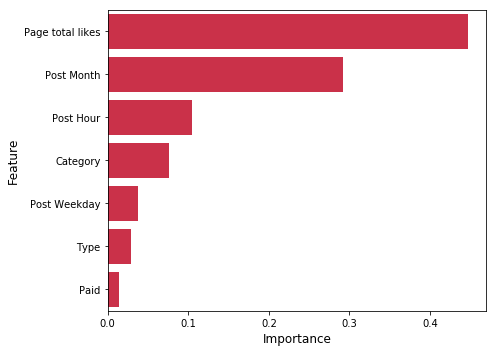

In [134]:
feature_imp = pd.DataFrame(sorted(zip(clf.feature_importance(importance_type='gain')/clf.feature_importance(importance_type='gain').sum(),
                                      X_train.columns)),
                           columns=['Value','Feature'])

plt.figure(figsize=(7,5))
sns.barplot(x="Value",
            y="Feature",
            data=feature_imp.sort_values(by="Value",
                                         ascending=False),
           color=theme_rg[0])

plt.ylabel('Feature')
plt.xlabel('Importance')
plt.tight_layout()
plt.savefig('importance.png')
plt.show()

In [44]:
theme_rg = ['#E31737','#44546A']

plt.rc('axes', labelsize=12)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)    # fontsize of the tick labels)

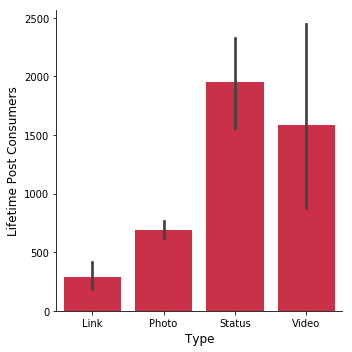

In [45]:
sns.catplot(y='Lifetime Post Consumers',
            x='Type',
            data=df,
            kind='bar',
            color=theme_rg[0])

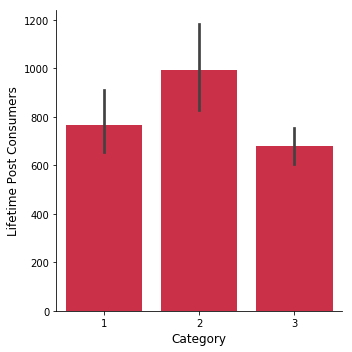

In [140]:
sns.catplot(y='Lifetime Post Consumers',
            x='Category',
            data=df,
            kind='bar',
            color=theme_rg[0])
plt.savefig('cat.png', bbox_inches='tight')

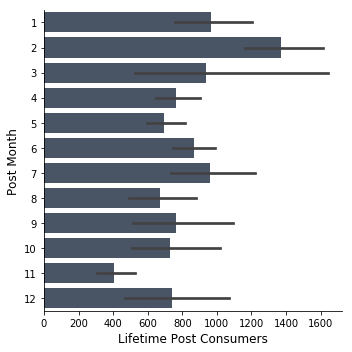

In [129]:
sns.catplot(x='Lifetime Post Consumers',
            y='Post Month',
            data=df,
            kind='bar',
            color=theme_rg[1])
plt.savefig('month.png', bbox_inches='tight')

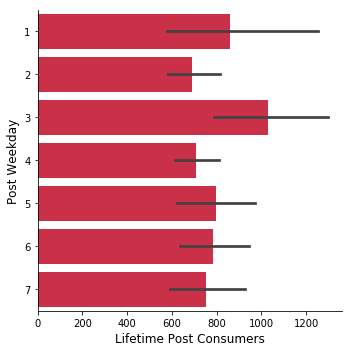

In [138]:
sns.catplot(x='Lifetime Post Consumers',
            y='Post Weekday',
            data=df,
            kind='bar',
            color=theme_rg[0])
plt.savefig('day.png', bbox_inches='tight')

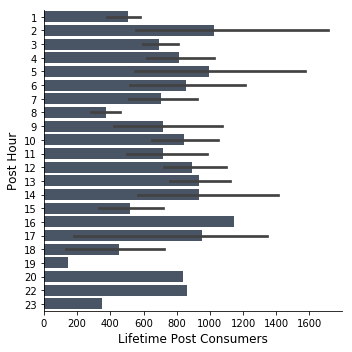

In [139]:
sns.catplot(x='Lifetime Post Consumers',
            y='Post Hour',
            data=df,
            kind='bar',
            color=theme_rg[1])
plt.savefig('hour.png', bbox_inches='tight')

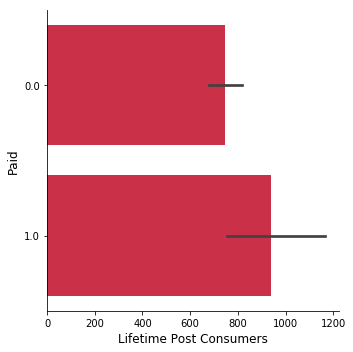

In [53]:
sns.catplot(x='Lifetime Post Consumers',
            y='Paid',
            data=df,
            kind='bar',
            color=theme_rg[0])

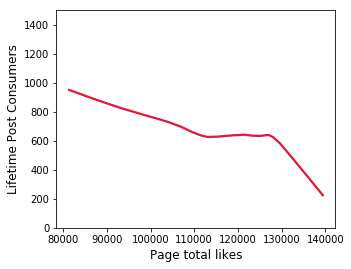

In [124]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 4)
sns.regplot(x='Page total likes',
            y='Lifetime Post Consumers',
            data=df,
            scatter_kws={'s':0},
            color=theme_rg[0],
            ax=ax,
            lowess=True)
ax.set_xlabel('Page total likes')
ax.set_ylabel('Lifetime Post Consumers')
ax.set_ylim(0,1500)
plt.savefig('reg1.png', bbox_inches='tight')

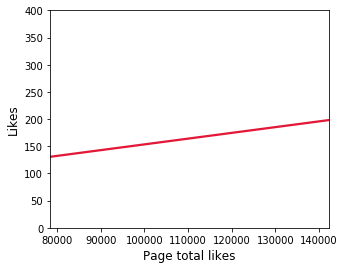

In [123]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 4)
sns.regplot(x='Page total likes',
            y='like',
            data=df,
            scatter_kws={'s':0},
            color=theme_rg[0],
            ax=ax,
            ci=False)
ax.set_xlabel('Page total likes')
ax.set_ylabel('Likes')
ax.set_ylim(0,400)
plt.savefig('reg2.png', bbox_inches='tight')